In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import statsmodels.api as sm

# Card drower

In [17]:
# колода карт
# Hearts (черви), Spades (пики), Clubs (трефы), Diamonds (в бубeн)
# Aec will have value: 1 for simplesity
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'Q', 'K']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)
deck = pd.Series(card_val, index=cards)

In [18]:
deck.head(13)

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
QH     10
KH     10
dtype: int64

In [23]:
def draw(deck, n=5):
    """function that gives u n=5(default) random cards
    deck: the deck itself
    n: number of cards to draw
    """
    return deck.take(np.random.permutation(len(deck))[:n])

In [24]:
draw(deck)

8H      8
8C      8
5H      5
KS     10
10D    10
dtype: int64

In [25]:
get_suit = lambda card: card[-1] #check the last leter(suit)

In [27]:
deck.groupby(get_suit, group_keys=False).apply(draw, 2) # take 2 cards each suit

8C     8
QC    10
5D     5
AD     1
QH    10
JH    10
3S     3
4S     4
dtype: int64

# групповое взвешенное среднее

In [3]:
# for check
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                'data': np.random.randn(8),
                'weights': np.random.rand(8)})
grouped = df.groupby('category')
get_weightmean = lambda g: np.average(g.data, weights=g.weights)

In [4]:
grouped.apply(get_weightmean)

category
a   -0.396297
b    0.188883
dtype: float64

In [7]:
# real data
close_px = pd.read_csv('examples/stock_px.csv', parse_dates=True,index_col=0)
close_px

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33
...,...,...,...,...,...,...,...,...,...
2011-10-10,10.09,388.81,16.14,186.62,64.43,26.94,61.87,1194.89,76.28
2011-10-11,10.30,400.29,16.14,185.00,63.96,27.00,60.95,1195.54,76.27
2011-10-12,10.05,402.19,16.40,186.12,64.33,26.96,62.70,1207.25,77.16
2011-10-13,10.10,408.43,16.22,186.82,64.23,27.18,62.36,1203.66,76.37


In [9]:
# corelation with SPX
spx_corr = lambda x: x.corrwith(x['SPX'])
rets = close_px.pct_change().dropna()
get_year = lambda x: x.year
by_year = rets.groupby(get_year)

In [12]:
by_year.apply(spx_corr).mean()

AA      0.530623
AAPL    0.454480
GE      0.717462
IBM     0.579110
JNJ     0.524637
MSFT    0.608878
PEP     0.480099
SPX     1.000000
XOM     0.548622
dtype: float64

In [13]:
by_year.apply(spx_corr)

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990,0.595024,0.545067,0.752187,0.738361,0.801145,0.586691,0.783168,1.0,0.517586
1991,0.453574,0.365315,0.759607,0.557046,0.646401,0.524225,0.641775,1.0,0.569335
1992,0.398180,0.498732,0.632685,0.262232,0.515740,0.492345,0.473871,1.0,0.318408
1993,0.259069,0.238578,0.447257,0.211269,0.451503,0.425377,0.385089,1.0,0.318952
1994,0.428549,0.268420,0.572996,0.385162,0.372962,0.436585,0.450516,1.0,0.395078
1995,0.291532,0.161829,0.519126,0.416390,0.315733,0.453660,0.413144,1.0,0.368752
1996,0.292344,0.191482,0.750724,0.388497,0.569232,0.564015,0.421477,1.0,0.538736
1997,0.564427,0.211435,0.827512,0.646823,0.703538,0.606171,0.509344,1.0,0.695653
1998,0.533802,0.379883,0.815243,0.623982,0.591988,0.698773,0.494213,1.0,0.369264
1999,0.099033,0.425584,0.710928,0.486167,0.517061,0.631315,0.336593,1.0,0.315383


In [14]:
by_year.apply(lambda g: g['MSFT'].corr(g['AAPL']))

1990    0.408271
1991    0.266807
1992    0.450592
1993    0.236917
1994    0.361638
1995    0.258642
1996    0.147539
1997    0.196144
1998    0.364106
1999    0.329484
2000    0.275298
2001    0.563156
2002    0.571435
2003    0.486262
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

In [15]:
#same?
by_year.apply(lambda g: g['MSFT'].corr(g['AAPL']))

1990    0.408271
1991    0.266807
1992    0.450592
1993    0.236917
1994    0.361638
1995    0.258642
1996    0.147539
1997    0.196144
1998    0.364106
1999    0.329484
2000    0.275298
2001    0.563156
2002    0.571435
2003    0.486262
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

# групповая линейная регрессия


In [20]:
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [24]:
sm.OLS?

In [23]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
1990,1.512772,0.001395
1991,1.187351,0.000396
1992,1.832427,0.000164
1993,1.390470,-0.002657
1994,1.190277,0.001617
1995,0.858818,-0.001423
1996,0.829389,-0.001791
1997,0.749928,-0.001901
1998,1.164582,0.004075
1999,1.384989,0.003273


# Временные ряды
## datetime и т.д.

In [33]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [34]:
delta

datetime.timedelta(days=926, seconds=56700)

In [35]:
from dateutil.parser import parse
parse('Jan 31, 1997 10:45 PM') # ogooo blin

datetime.datetime(1997, 1, 31, 22, 45)

In [2]:
pd.DataFrame.groupby??

In [3]:
data1 = pd.Series(np.arange(10), index=pd.date_range('10/01/2020',periods=10,freq='M'))
data1

2020-10-31    0
2020-11-30    1
2020-12-31    2
2021-01-31    3
2021-02-28    4
2021-03-31    5
2021-04-30    6
2021-05-31    7
2021-06-30    8
2021-07-31    9
Freq: M, dtype: int32

In [8]:
data_utc = data1.tz_localize('UTC')
data_utc

2020-10-31 00:00:00+00:00    0
2020-11-30 00:00:00+00:00    1
2020-12-31 00:00:00+00:00    2
2021-01-31 00:00:00+00:00    3
2021-02-28 00:00:00+00:00    4
2021-03-31 00:00:00+00:00    5
2021-04-30 00:00:00+00:00    6
2021-05-31 00:00:00+00:00    7
2021-06-30 00:00:00+00:00    8
2021-07-31 00:00:00+00:00    9
Freq: M, dtype: int32

In [11]:
data_america = data_utc.tz_convert('America/New_York')
data_america

2020-10-30 20:00:00-04:00    0
2020-11-29 19:00:00-05:00    1
2020-12-30 19:00:00-05:00    2
2021-01-30 19:00:00-05:00    3
2021-02-27 19:00:00-05:00    4
2021-03-30 20:00:00-04:00    5
2021-04-29 20:00:00-04:00    6
2021-05-30 20:00:00-04:00    7
2021-06-29 20:00:00-04:00    8
2021-07-30 20:00:00-04:00    9
Freq: M, dtype: int32

In [13]:
data_america.tz_convert('Europe/Berlin')

2020-10-31 01:00:00+01:00    0
2020-11-30 01:00:00+01:00    1
2020-12-31 01:00:00+01:00    2
2021-01-31 01:00:00+01:00    3
2021-02-28 01:00:00+01:00    4
2021-03-31 02:00:00+02:00    5
2021-04-30 02:00:00+02:00    6
2021-05-31 02:00:00+02:00    7
2021-06-30 02:00:00+02:00    8
2021-07-31 02:00:00+02:00    9
Freq: M, dtype: int32

In [14]:
p = pd.Period('2001',freq='M')
p

Period('2001-01', 'M')

In [17]:
p = p.asfreq('Y')

In [18]:
p+1

Period('2002', 'A-DEC')

In [19]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [21]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

In [22]:
data.index = index

In [23]:
data.realint

1959Q1    0.00
1959Q2    0.74
1959Q3    1.09
1959Q4    4.06
1960Q1    1.19
          ... 
2008Q3    4.33
2008Q4    8.91
2009Q1   -0.71
2009Q2   -3.19
2009Q3   -3.44
Freq: Q-DEC, Name: realint, Length: 203, dtype: float64

# Передискретизация периодов


In [26]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('01-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [29]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.247080,0.016516,-0.108695,-0.245967
2001,-0.113821,-0.139958,0.094802,-0.452807


In [31]:
annual_frame.resample('Q-DEC',convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.247080,0.016516,-0.108695,-0.245967
2001Q1,0.247080,0.016516,-0.108695,-0.245967
2001Q2,0.247080,0.016516,-0.108695,-0.245967
2001Q3,0.247080,0.016516,-0.108695,-0.245967
2001Q4,-0.113821,-0.139958,0.094802,-0.452807


In [32]:
annual_frame.resample('Q-DEC',convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.247080,0.016516,-0.108695,-0.245967
2000Q2,0.247080,0.016516,-0.108695,-0.245967
2000Q3,0.247080,0.016516,-0.108695,-0.245967
2000Q4,0.247080,0.016516,-0.108695,-0.245967
2001Q1,-0.113821,-0.139958,0.094802,-0.452807
2001Q2,-0.113821,-0.139958,0.094802,-0.452807
2001Q3,-0.113821,-0.139958,0.094802,-0.452807
2001Q4,-0.113821,-0.139958,0.094802,-0.452807


# Скользящие оконные функции

In [36]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',parse_dates=True, index_col=0)
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [48]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [49]:
close_px = close_px.resample('B').asfreq()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<IPython.core.display.Javascript object>


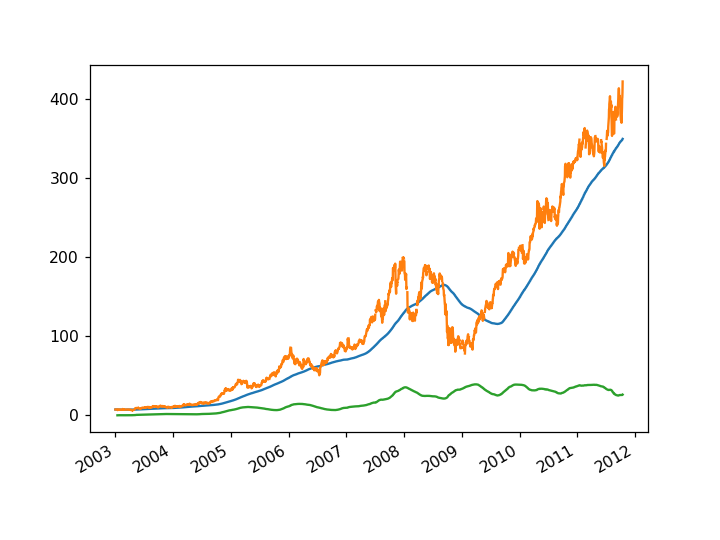

In [83]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(close_px.AAPL.rolling(250, min_periods=1).mean())
ax.plot(close_px.AAPL)

In [85]:
print(close_px.AAPL.rolling(250, min_periods=10)) 

Rolling [window=250,min_periods=10,center=False,axis=0,method=single]


<IPython.core.display.Javascript object>


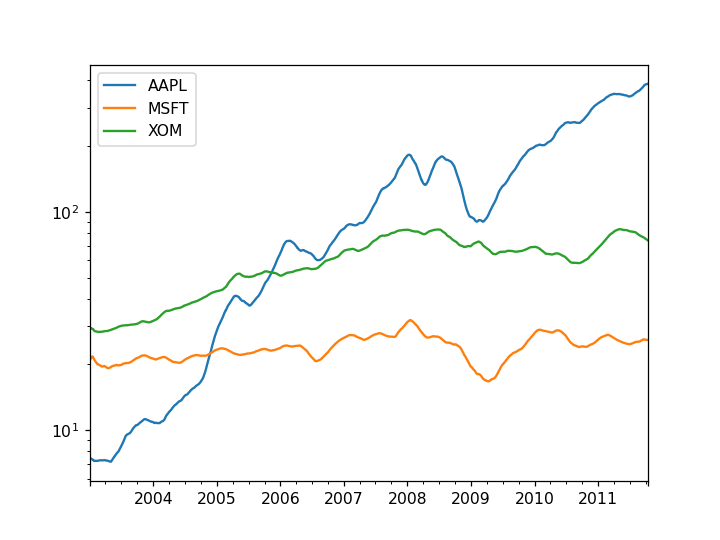

<AxesSubplot: >

In [87]:
close_px.rolling(60,min_periods=1).mean().plot(logy=True)

# Экспоненциально взвешенные функции

In [95]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=1).mean()
ewma60 = aapl_px.ewm(span=30).mean()

ewma60.plot(style='r-', label='EW MA')
#нужно доразобрать

<AxesSubplot: >

In [103]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

<IPython.core.display.Javascript object>


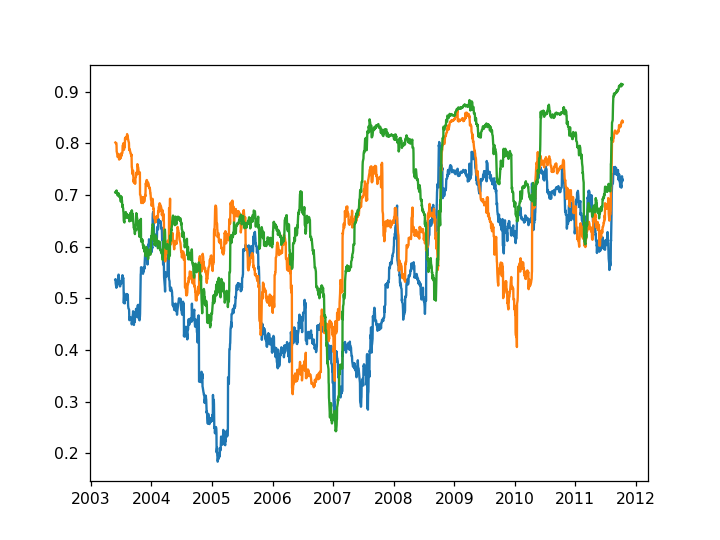

In [106]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(corr)

# Разбор интересующих микромоментов

In [3]:
cat_s = pd.Series(['a', 'b', 'c', 'd'] * 2, dtype='category')
pd.get_dummies(cat_s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


In [32]:
df = pd.DataFrame({'key': ['a', 'b', 'c', 'd', 'e'] * 100000, 'value': np.arange(500000)})


In [33]:
g1 = df.groupby('key').value # after func become Ser
g2 = df.groupby('key') # after func become Df

g1.mean()

key
a    249997.5
b    249998.5
c    249999.5
d    250000.5
e    250001.5
Name: value, dtype: float64

In [15]:
func = lambda x: x*2
g1.apply(func) # transform

C:\Users\g.ermolaev\AppData\Local\Temp\ipykernel_3328\2661658212.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  g1.apply(func)


0      0
1      2
2      4
3      6
4      8
5     10
6     12
7     14
8     16
9     18
10    20
11    22
Name: value, dtype: int32

In [34]:
%%time
def normalize(x):
     return (x - x.mean()) / x.std()
g1.transform(normalize)

CPU times: total: 93.8 ms
Wall time: 101 ms


0        -1.732025
1        -1.732025
2        -1.732025
3        -1.732025
4        -1.732025
            ...   
499995    1.732025
499996    1.732025
499997    1.732025
499998    1.732025
499999    1.732025
Name: value, Length: 500000, dtype: float64

In [35]:
%%time
def normalize2(x):
     return (x - x.mean()) / x.std()
g1.apply(normalize2)

CPU times: total: 93.8 ms
Wall time: 101 ms


<timed exec>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)


0        -1.732025
1        -1.732025
2        -1.732025
3        -1.732025
4        -1.732025
            ...   
499995    1.732025
499996    1.732025
499997    1.732025
499998    1.732025
499999    1.732025
Name: value, Length: 500000, dtype: float64

In [36]:
%%time
normalized = (df['value'] - g1.transform('mean'))/g1.transform('std')
normalized

CPU times: total: 15.6 ms
Wall time: 25 ms


0        -1.732025
1        -1.732025
2        -1.732025
3        -1.732025
4        -1.732025
            ...   
499995    1.732025
499996    1.732025
499997    1.732025
499998    1.732025
499999    1.732025
Name: value, Length: 500000, dtype: float64

In [39]:
N = 15
times = pd.date_range('2017-05-20 00:00', freq='1min', periods=N)
sample = pd.DataFrame({'time':times.repeat(3),
                      'key':list('abd')*N,
                      'value':np.random.randint(10, size=N*3)})

In [41]:
sample.head()

,time,key,value
0,2017-05-20 00:00:00,a,1
1,2017-05-20 00:00:00,b,7
2,2017-05-20 00:00:00,d,1
3,2017-05-20 00:01:00,a,1
4,2017-05-20 00:01:00,b,5


In [49]:
date_key = pd.Grouper(freq='5min')

In [54]:
# finaly understand Groper obj...(need to be faster)
resampled = (sample.set_index('time')
             .groupby(['key', date_key])
             .std())
resampled

value
key time                         
a   2017-05-20 00:00:00  3.633180
    2017-05-20 00:05:00  3.033150
    2017-05-20 00:10:00  2.966479
b   2017-05-20 00:00:00  1.949359
    2017-05-20 00:05:00  2.915476
    2017-05-20 00:10:00  2.449490
d   2017-05-20 00:00:00  3.049590
    2017-05-20 00:05:00  3.082207
    2017-05-20 00:10:00  2.774887

In [60]:
resampled.reset_index().set_index('key')

,time,value
key,,
a,2017-05-20 00:00:00,3.633180
a,2017-05-20 00:05:00,3.033150
a,2017-05-20 00:10:00,2.966479
b,2017-05-20 00:00:00,1.949359
b,2017-05-20 00:05:00,2.915476
b,2017-05-20 00:10:00,2.449490
d,2017-05-20 00:00:00,3.049590
d,2017-05-20 00:05:00,3.082207
d,2017-05-20 00:10:00,2.774887


In [61]:
df = pd.DataFrame(np.arange(30).reshape(5,6), columns=list('abcdef'))
df

,a,b,c,d,e,f
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29


In [63]:
df.loc[:,"a":"e"]

,a,b,c,d,e
0,0,1,2,3,4
1,6,7,8,9,10
2,12,13,14,15,16
3,18,19,20,21,22
4,24,25,26,27,28


In [6]:
!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org patsy

In [9]:
data = pd.DataFrame({'x0': np.arange(5)+1,
                      'x1': [0.01, -0.01, 0.25, -4.1, 0.],
                       'y': [-1.5, 0., 3.6, 1.3, -2.]})
y, X = patsy.dmatrices('y ~ x0 + np.log(np.abs(x1) + 1)', data)

In [3]:
import patsy #тестил выше

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
str = 'на трёхосевом поворотном столе'
str.upper()

'НА ТРЁХОСЕВОМ ПОВОРОТНОМ СТОЛЕ'

In [6]:
sm.OLS?

In [8]:
!pip install -U --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org scikit-learn

#  checking some NumPy features

In [20]:
arr = np.empty([4,3])
arr = np.arange(4).transpose().repeat(3,axis=1) # ok nwm

AxisError: axis 1 is out of bounds for array of dimension 1

array([[1.15761525e-311, 2.47032823e-322, 0.00000000e+000],
       [0.00000000e+000, 1.24611673e-306, 1.16095484e-028],
       [3.65093134e+233, 9.13273116e+140, 6.32672800e+180],
       [4.74483502e+170, 4.59210323e-072, 4.93432906e+257]])